In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the data

In [37]:
df=pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### EDA

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [39]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


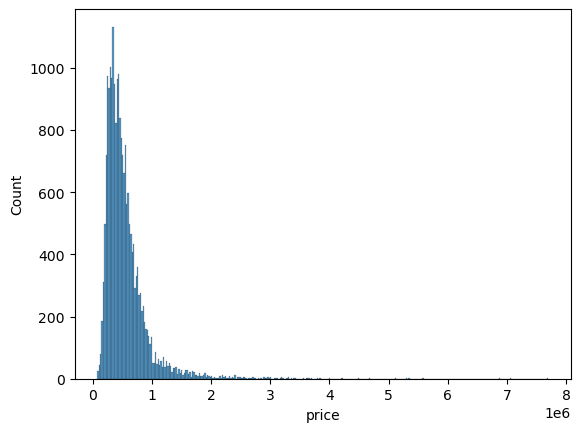

In [65]:
sns.histplot(data=df,x='price')
plt.show()

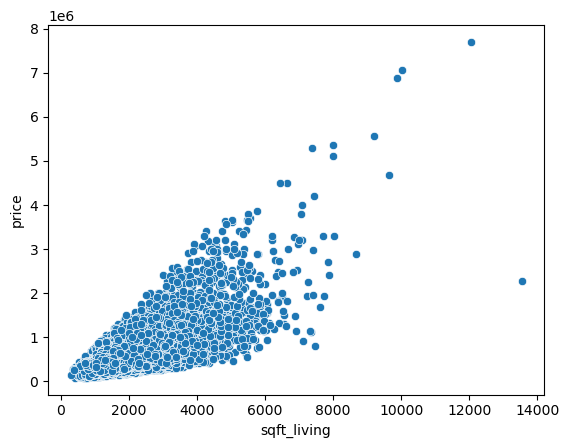

In [40]:
sns.scatterplot(data=df,x='sqft_living',y='price')
plt.show()

In [41]:
# Drop the columns
df.drop(columns = ['date','yr_built','yr_renovated','id','zipcode'], inplace=True)

In [42]:
# Change the datatype
df['price'] = df['price'].astype(int)

In [43]:
# Remove Outliers
# Calculate Q1 and Q3
Q1 = df[['price', 'sqft_living']].quantile(0.25)
Q3 = df[['price', 'sqft_living']].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Filter out outliers based on IQR
df1 = df[((df[['price', 'sqft_living']] < (Q1 - 1.5 * IQR)) | (df[['price', 'sqft_living']] > (Q3 + 1.5 * IQR))).any(axis=1)]
df1

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15
5,1225000,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,47.6561,-122.005,4760,101930
21,2000000,3,2.75,3050,44867,1.0,0,4,3,9,2330,720,47.5316,-122.233,4110,20336
49,1350000,3,2.50,2753,65005,1.0,1,2,5,9,2165,588,47.4041,-122.451,2680,72513
69,1325000,5,2.25,3200,20158,1.0,0,0,3,8,1600,1600,47.6303,-122.215,3390,20158
70,1040000,5,3.25,4770,50094,1.0,0,0,4,11,3070,1700,47.6525,-122.160,3530,38917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21568,1700000,4,3.50,3830,8963,2.0,0,0,3,10,3120,710,47.5990,-122.197,2190,10777
21576,3567000,5,4.50,4850,10584,2.0,1,4,3,10,3540,1310,47.5943,-122.110,3470,18270
21590,1222500,4,3.50,4910,9444,1.5,0,0,3,11,3110,1800,47.6502,-122.066,4560,11063
21597,1575000,4,3.25,3410,10125,2.0,0,0,3,10,3410,0,47.5653,-122.223,2290,10125


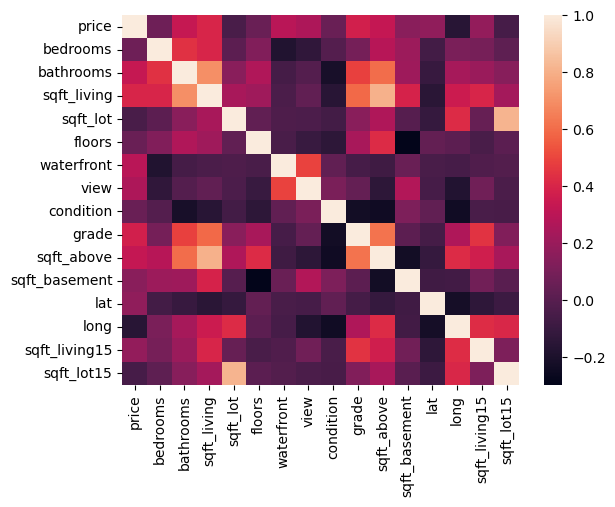

In [44]:
sns.heatmap(df1.corr())
plt.show()

In [45]:
correlation=df.corr()
price_corr = correlation[['price']]
corr_with_price=price_corr.sort_values(by='price',ascending=False)
corr_with_price

,price
price,1.000000
sqft_living,0.702035
grade,0.667434
sqft_above,0.605567
sqft_living15,0.585379
bathrooms,0.525138
view,0.397293
sqft_basement,0.323816
bedrooms,0.308350
lat,0.307003


In [49]:
df2 = df1[['sqft_living','bedrooms','bathrooms','price']]
corr_matrix = df2.corr()
print(corr_matrix)

             sqft_living  bedrooms  bathrooms     price
sqft_living     1.000000  0.399933   0.699667  0.402167
bedrooms        0.399933  1.000000   0.439106  0.072892
bathrooms       0.699667  0.439106   1.000000  0.332067
price           0.402167  0.072892   0.332067  1.000000


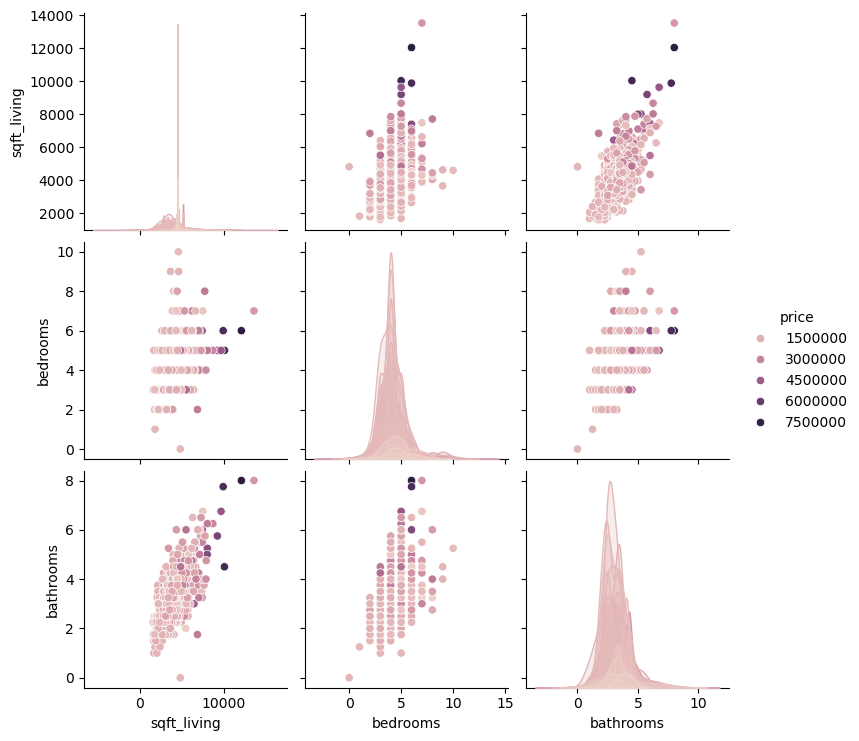

In [52]:
sns.pairplot(df2,hue='price')
plt.show()

In [53]:
df2

,sqft_living,bedrooms,bathrooms,price
5,5420,4,4.50,1225000
21,3050,3,2.75,2000000
49,2753,3,2.50,1350000
69,3200,5,2.25,1325000
70,4770,5,3.25,1040000
...,...,...,...,...
21568,3830,4,3.50,1700000
21576,4850,5,4.50,3567000
21590,4910,4,3.50,1222500
21597,3410,4,3.25,1575000


In [66]:
X=df2.drop(columns=['sqft_living','price'])
y=df2['price']

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [67]:
scaler=StandardScaler()
scaled_X_train=scaler.fit_transform(X_train)
scaled_X_test=scaler.fit_transform(X_test)

In [68]:
model = LinearRegression()
model

LinearRegression()

In [69]:
model.fit(scaled_X_train, y_train)

LinearRegression()

In [70]:
prediction = model.predict(scaled_X_test)

In [71]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

test_1 = mean_absolute_error(y_test,prediction)
test_2 = mean_squared_error(y_test,prediction)
test_3 = r2_score(y_test,prediction)

print("Mean Absolute Error= ", test_1)
print("Mean Squared Error= ", test_2)
print("R squared Error= ", test_3)

Mean Absolute Error=  450765.40896413923
Mean Squared Error=  445784910804.86224
R squared Error=  0.10873846543039933


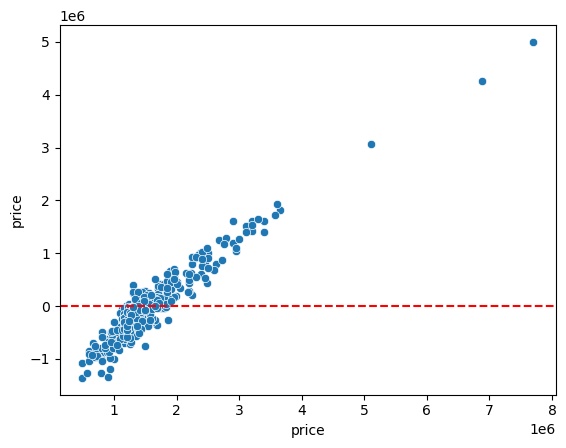

In [73]:
error = y_test - prediction
sns.scatterplot(x=y_test,y=error)
plt.axhline(y=0, color='red',ls='--')
plt.show()

In [77]:
import warnings
warnings.filterwarnings('ignore')

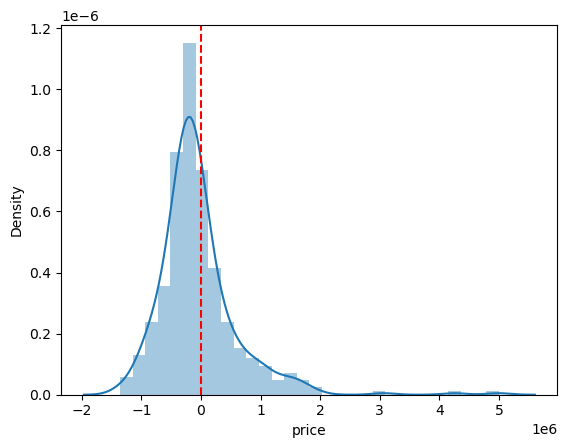

In [79]:
error.mean()
sns.distplot(error,bins=30,kde=True)
plt.axvline(x=0, color='red',ls='--')
plt.show()

### OLS regression

In [81]:
import statsmodels.api as sm

In [82]:
X = sm.add_constant(X)

In [83]:
model=sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     87.20
Date:                Tue, 15 Oct 2024   Prob (F-statistic):           2.72e-36
Time:                        01:38:31   Log-Likelihood:                -19514.
No. Observations:                1321   AIC:                         3.903e+04
Df Residuals:                    1318   BIC:                         3.905e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.948e+05   8.64e+04     10.357      0.0